In [1]:
import json

params_names = [
    'number_of_pivots',
    'number_of_iterations',
    'eps'
]

dataset_name = 'les_miserables'

data = {}
for params_name in params_names:
    with open(f'data/explore_limitation/{dataset_name}/all_{params_name}.json') as f:
        data[params_name] = json.load(f)


In [2]:
ymaps = {}
xmaps = {}

for params_name in params_names:
    pd = data[params_name][params_name]

    xs = []
    ymap = {
        "angular_resolution": [],
        "aspect_ratio": [],
        "crossing_angle": [],
        "crossing_number": [],
        "gabriel_graph_property": [],
        "ideal_edge_length": [],
        "node_resolution": [],
        "shape_based_metrics": [],
        "stress": []
    }

    for p in pd:
        d = pd[p]
        for q in d['quality_metrics']:
            ymap[q].append(d['quality_metrics'][q])

        xs.append(d['params'][params_name])
    xmaps[params_name] = xs
    ymaps[params_name] = ymap

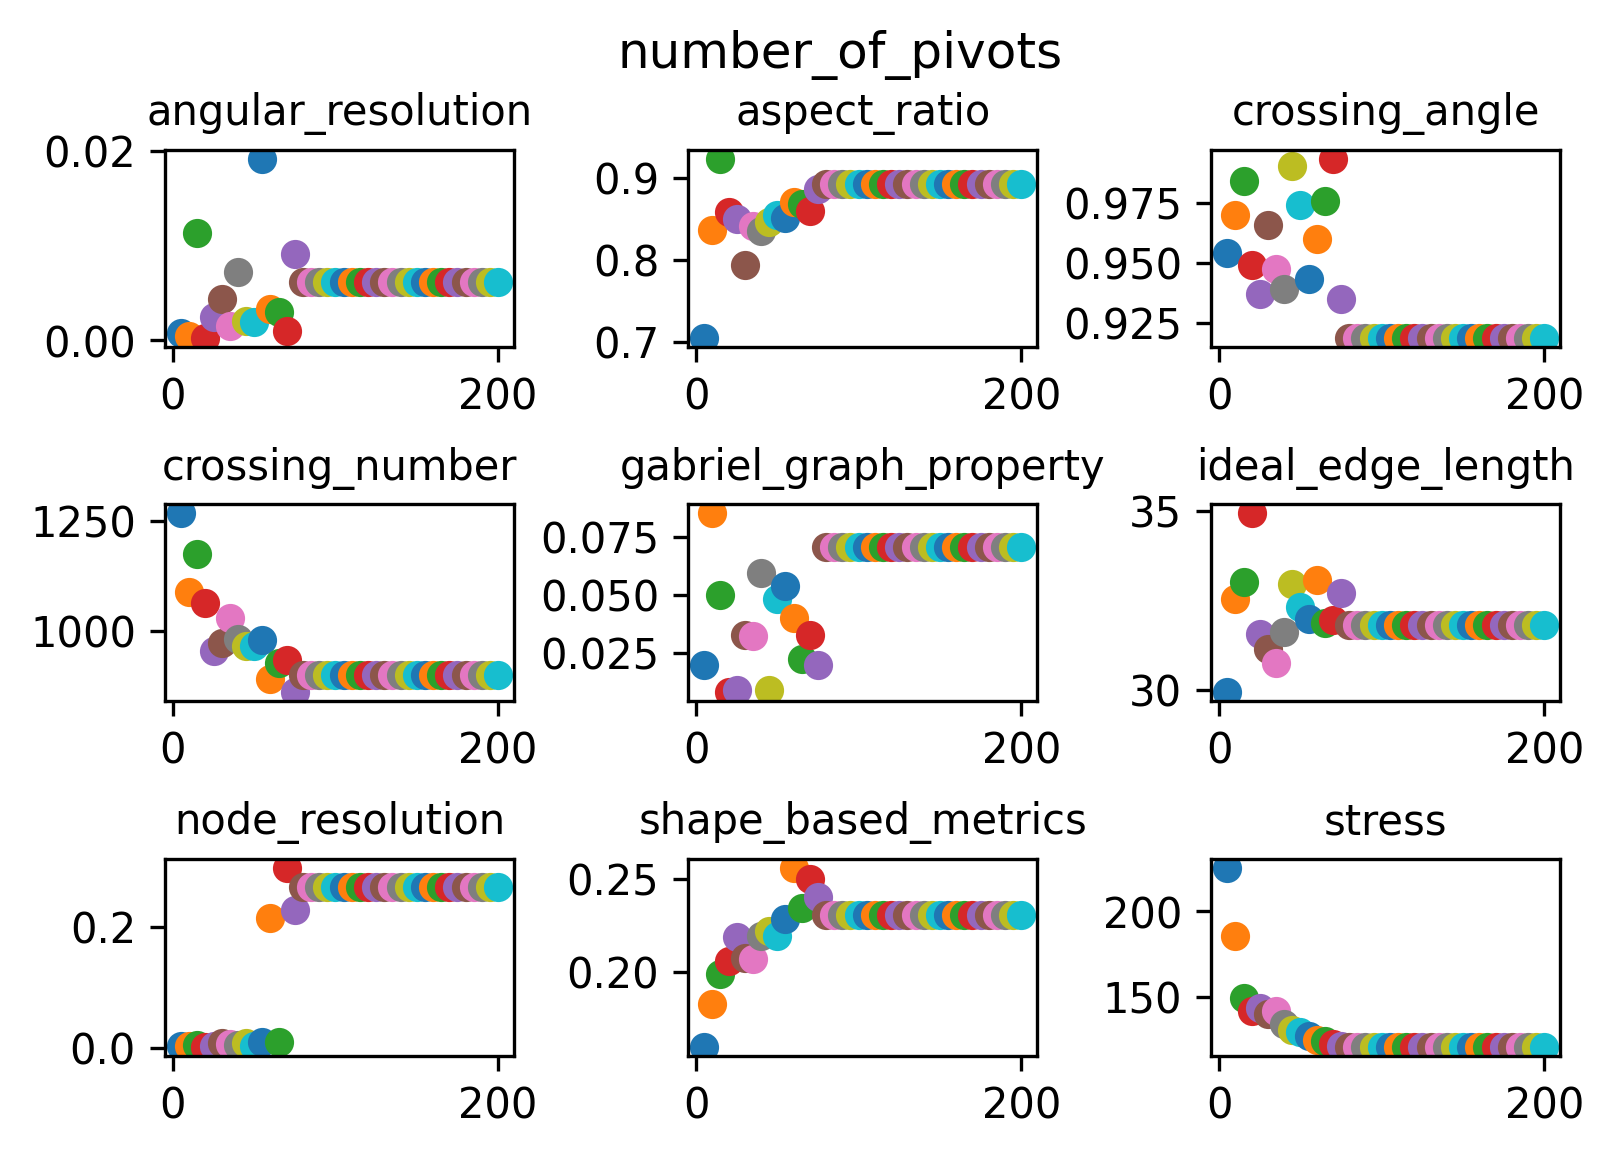

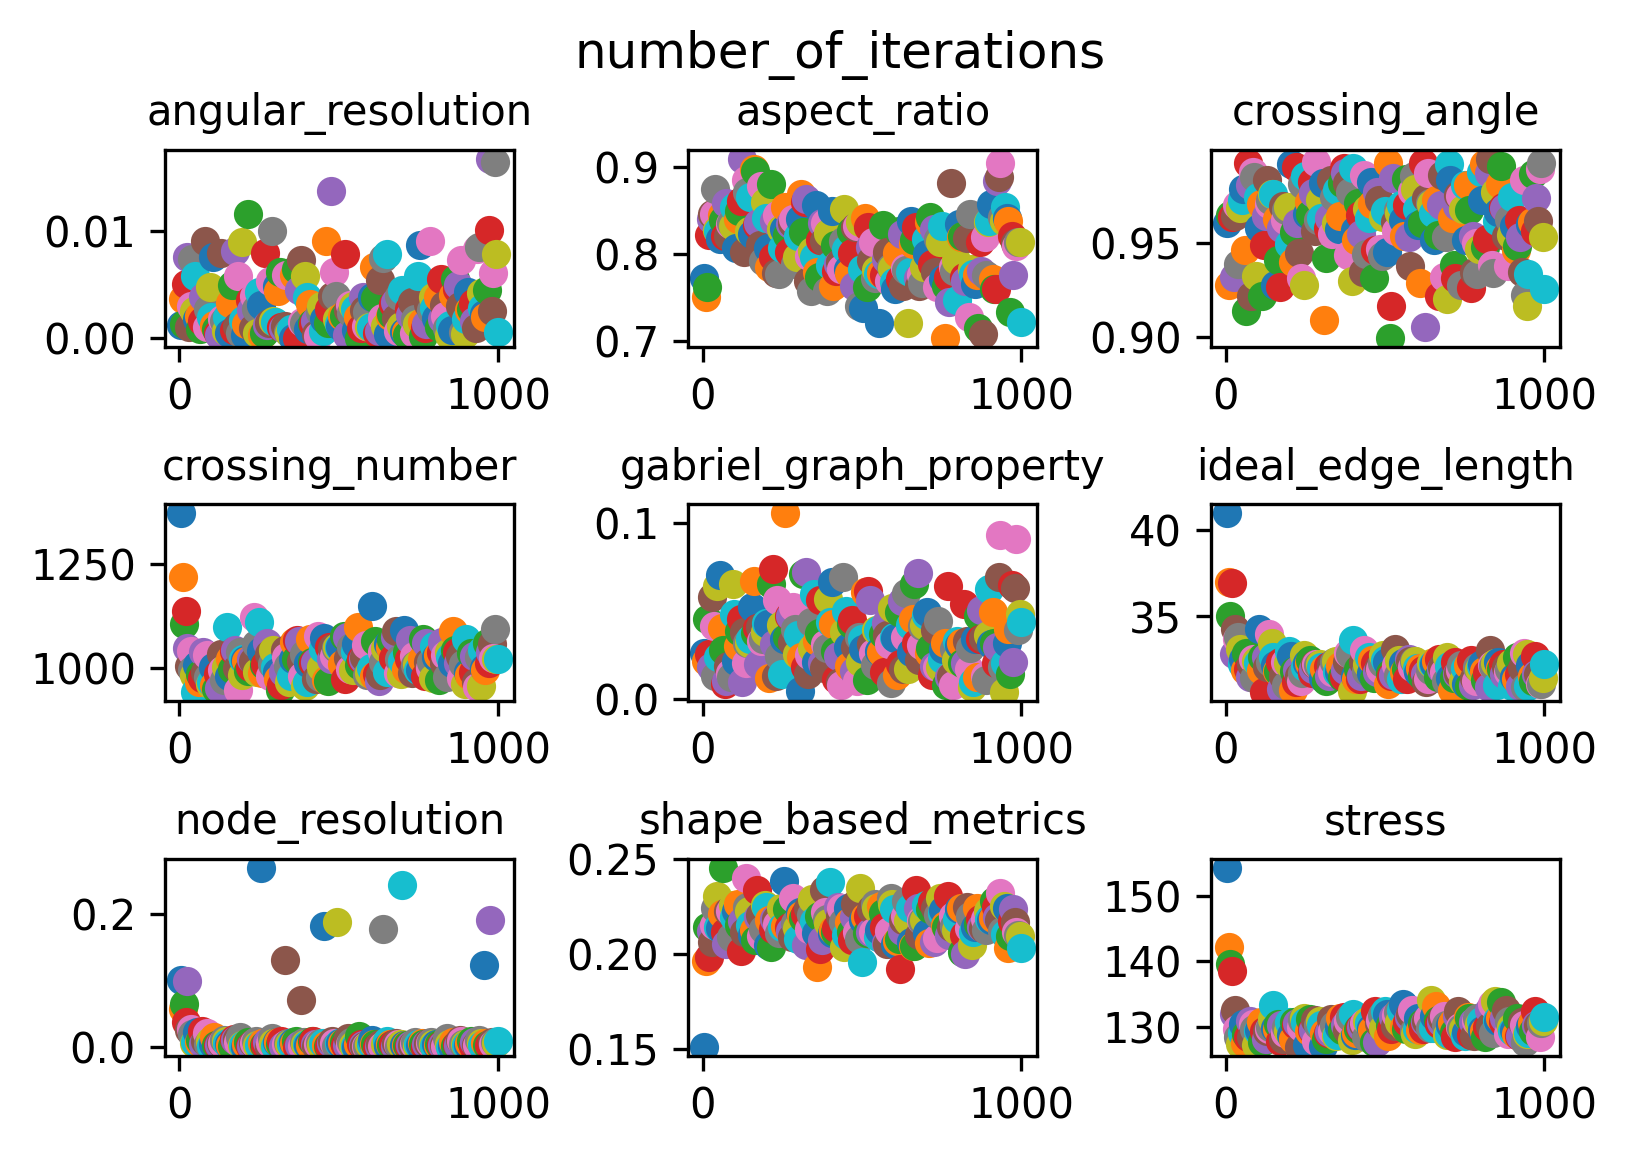

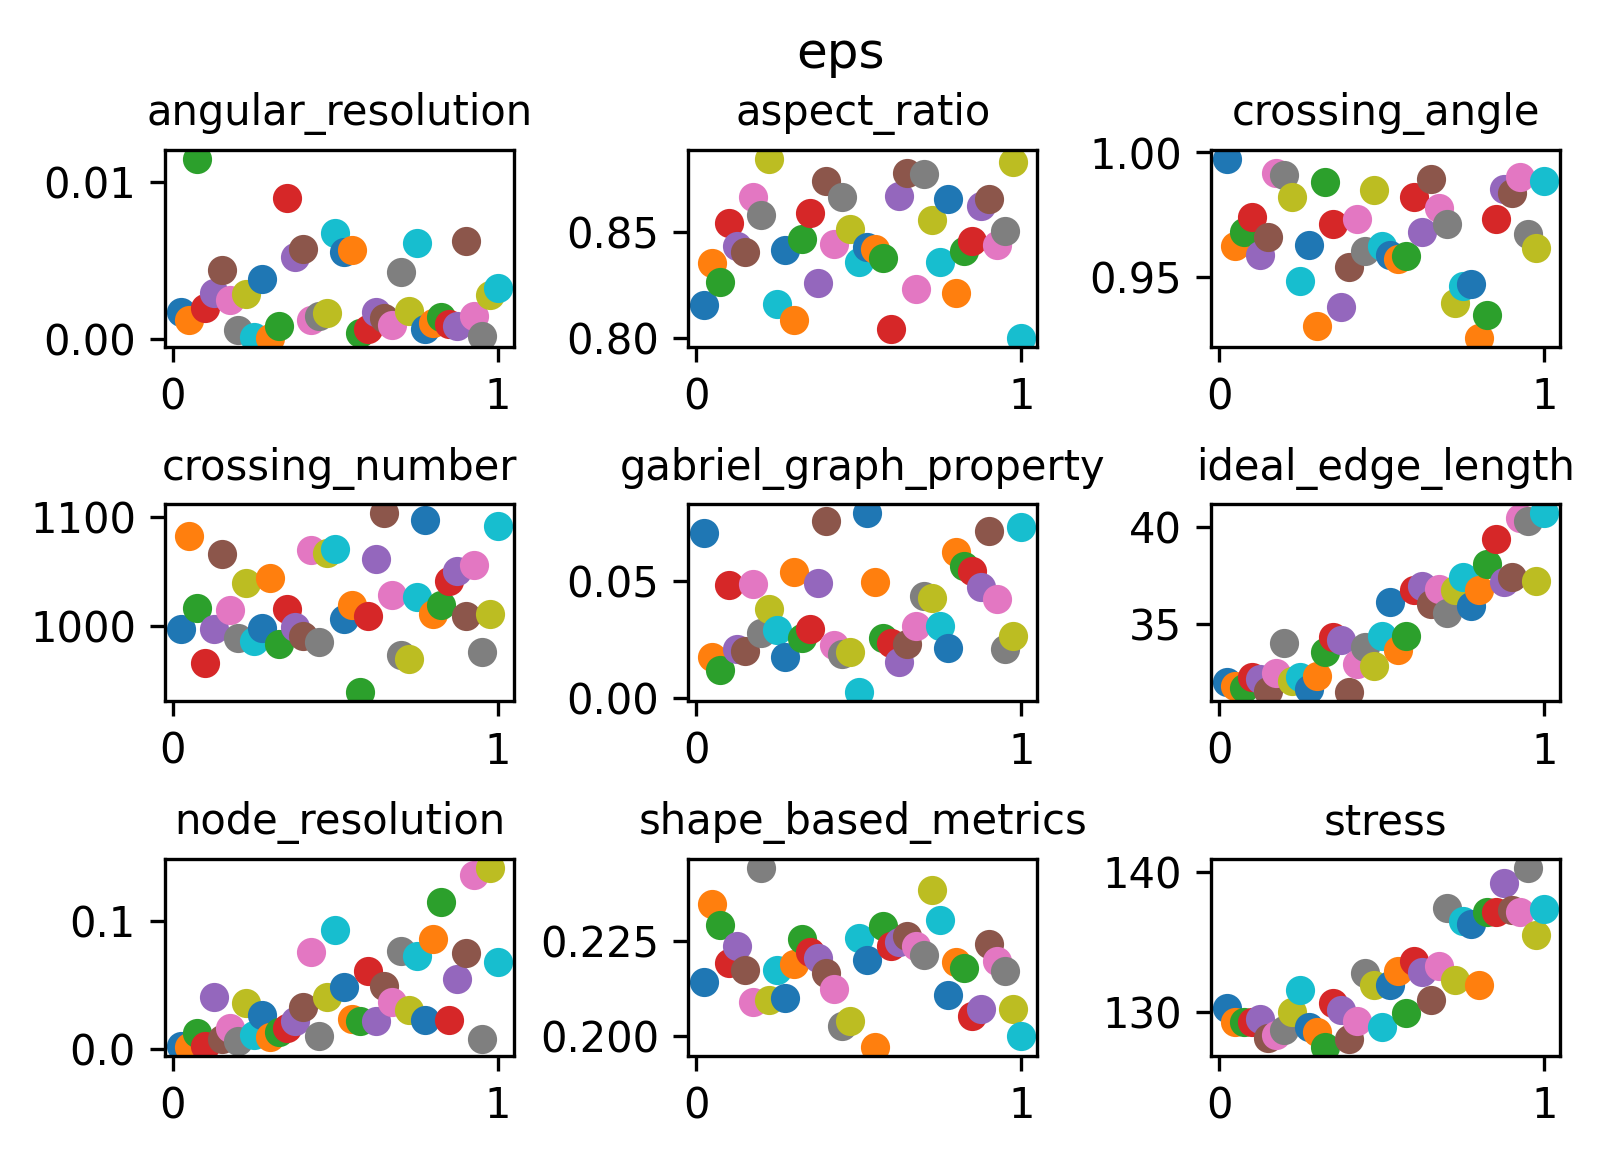

In [3]:
import matplotlib.pyplot as plt

qs = [
    "angular_resolution",
    "aspect_ratio",
    "crossing_angle",
    "crossing_number",
    "gabriel_graph_property",
    "ideal_edge_length",
    "node_resolution",
    "shape_based_metrics",
    "stress"
]

for params_name in params_names:
    i = 1
    ymap = ymaps[params_name]
    xmap = xmaps[params_name]
    plt.figure(dpi=300)
    plt.subplots_adjust(wspace=0.5, hspace=0.8)
    plt.suptitle(params_name)
    for q in ymap:
        plt.subplot(int(f'33{i}'))
        plt.title(q, fontsize=10)
        # if params_name == 'eps':
            # plt.xscale("log")
            # plt.semilogx()
        for x, y in zip(xmap[:200], ymap[q][:200]):
            plt.scatter(x, y)

        i += 1
    plt.show()
